In [1]:
# 3 train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at 1 line only
three_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('3')]

In [4]:
# look at all station names
three_train_all['STATION'].unique()

array(['116 ST', '125 ST', '135 ST', '14 ST', '34 ST-PENN STA',
       '42 ST-PORT AUTH', '6 AV', '72 ST', '96 ST', 'ATL AV-BARCLAY',
       'BERGEN ST', 'BOROUGH HALL', 'BOTANIC GARDEN', 'CENTRAL PK N110',
       'CHAMBERS ST', 'CLARK ST', 'CROWN HTS-UTICA', 'EASTN PKWY-MUSM',
       'FRANKLIN AV', 'FULTON ST', 'GRAND ARMY PLAZ', 'HARLEM 148 ST',
       'HOYT ST', 'JUNIUS ST', 'KINGSTON AV', 'NEVINS ST', 'NEW LOTS AV',
       'NOSTRAND AV', 'PARK PLACE', 'PENNSYLVANIA AV', 'ROCKAWAY AV',
       'SARATOGA AV', 'SUTTER AV-RUTLD', 'TIMES SQ-42 ST',
       'VAN SICLEN AV', 'WALL ST', 'WORLD TRADE CTR'], dtype=object)

In [5]:
# check station count
three_train_all['STATION'].count()

46

In [7]:
# needs further cleaning
three_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)
three_train_all["STATION"].replace("WORLD TRADE CTR", value="CHAMBERS ST", inplace=True)
three_train_all["STATION"].replace("6 AV", value="14 ST", inplace=True)
three_train_all["STATION"].replace("BOTANIC GARDEN", value="FRANKLIN AV", inplace=True)

In [8]:
# now sum same name rows
three_commuters = three_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
three_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
116 ST,8197.0,2255.0
125 ST,7578.0,4778.0
135 ST,5182.0,817.0
14 ST,6159.0,8166.0
34 ST-PENN STA,91903.0,36743.0


In [9]:
# order stations in excel
# save as csv
three_commuters.to_csv('three_commuters.csv')

In [13]:
# open ordered CSV
csv_path_3 = 'three_commuters_order.csv'
three_commuters_order = pd.read_csv(csv_path_3, encoding="utf-8")
three_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,HARLEM 148 ST,2766,423
1,135 ST,5182,817
2,125 ST,7578,4778
3,116 ST,8197,2255
4,CENTRAL PK N110,2770,1855


In [14]:
three_commuters_order['AM_AVG_ENTER'] = three_commuters_order['AM_ENTERS']/5

In [15]:
three_commuters_order['AM_AVG_EXIT'] = three_commuters_order['AM_EXITS']/5
three_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,HARLEM 148 ST,2766,423,553.2,84.6
1,135 ST,5182,817,1036.4,163.4
2,125 ST,7578,4778,1515.6,955.6
3,116 ST,8197,2255,1639.4,451.0
4,CENTRAL PK N110,2770,1855,554.0,371.0


In [16]:
# order stations in excel
# save as csv
three_commuters_order.to_csv('three_commuters_final.csv')

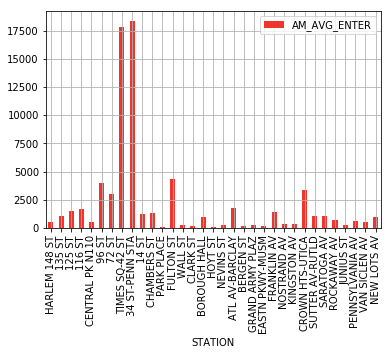

In [17]:
# graph 3 Train AM AVG ENTERS
plt = three_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#EE352E')
plt.grid()

# save the fig
plt.figure.savefig('3-AM-enter.pdf')

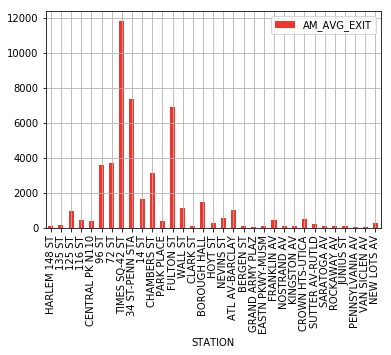

In [18]:
# graph 3 Train AM AVG EXITS
plt = three_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#EE352E')
plt.grid()

# save the fig
plt.figure.savefig('3-AM-exit.pdf')